In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
import sys
sys.path.append('../Utilities')
sys.path.append('../ControllersObject')
sys.path.append('../')

import LMPC
import SysModel
from trackInitialization import Map
import utilities
import pwa_cluster as pwac

import matplotlib.pyplot as plt

In [20]:
trackMap = Map('3110_big') 
dt = 0.1
n = 6; d = 2
state_names = ['vx', 'vy', 'wz', 'epsi', 's', 'ey']

n_data = 1000

In [21]:
def generate_random_input():
    # x = [vx, vy, wz, epsi, s, ey]
    # u = [delta, a]
    x = np.random.uniform(size=[n]) * np.array([3, 1, 1, 1, trackMap.TrackLength, 2*0.8]) + np.array([0, 0, 0, 0, 0, -0.8])
    u = np.random.uniform(size=[d]) * np.array([1, 2]) + np.array([-0.5, -1])
    return x, u

def get_z_y_pair():
    x, u = generate_random_input()
    x_glob = trackMap.get_global_state(x)
    x_next, x_glob_next = SysModel._DynModel(x, x_glob, u, dt, trackMap.PointAndTangent)
    return np.hstack([x,u]), x_next


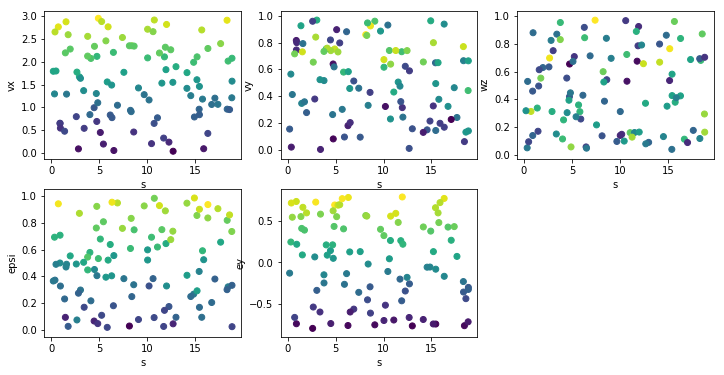

In [22]:
zs = []; ys = []
for i in range(n_data):
    z, y = get_z_y_pair()
    zs.append(z); ys.append(y)

zs = np.array(zs)
ys = np.array(ys)
    
plt.figure(figsize=[12,6])

for i in range(n-1):
    plt.subplot(2, 3, i+1)
    ind = i if i < 4 else 5
    plt.scatter(zs[::10,4], zs[::10,ind], c=ys[::10,ind])
    plt.xlabel(state_names[4]); plt.ylabel(state_names[ind])

In [31]:
best_clustering = pwac.ClusterPWA.from_num_clusters(zs, ys, 10, z_cutoff=n)

In [32]:
best_clustering.fit_clusters(verbose=True)

assigning datapoints to clusters
updating models
centroid movement 3.08010987136
assigning datapoints to clusters
updating models
centroid movement 1.00325057878
assigning datapoints to clusters
updating models
centroid movement 0.448949672405
assigning datapoints to clusters
updating models
centroid movement 0.479042708553
assigning datapoints to clusters
updating models
centroid movement 0.312969908799
assigning datapoints to clusters
updating models
centroid movement 0.366510190644
assigning datapoints to clusters
updating models
centroid movement 0.23260808099
assigning datapoints to clusters
updating models
centroid movement 0.134520900204
assigning datapoints to clusters
updating models
centroid movement 0.196415722289
assigning datapoints to clusters
updating models
centroid movement 0.218780747166
assigning datapoints to clusters
updating models
centroid movement 0.16000388894
assigning datapoints to clusters
updating models
centroid movement 0.204801720532
assigning datapoints

In [8]:
nc_list = [1,4,6,10]
best_clustering, ind_perm = pwac.select_nc_cross_validation(nc_list, zs, ys, verbose=True, z_cutoff=n, affine=True)


===================== Fitting model with Nc= 1 ====================
assigning datapoints to clusters
updating models
centroid movement 5.79829317103
assigning datapoints to clusters
updating models
centroid movement 0.0
done
(375, 6) (125, 6)
avg train error: 0.0273206755361
avg test error: 0.0440332055205
===================== Fitting model with Nc= 4 ====================
assigning datapoints to clusters
updating models
centroid movement 3.19765898394
assigning datapoints to clusters
updating models
centroid movement 1.8367619181
assigning datapoints to clusters
updating models
centroid movement 1.49253270836
assigning datapoints to clusters
updating models
centroid movement 0.937857428704
assigning datapoints to clusters
updating models
centroid movement 0.80586186362
assigning datapoints to clusters
updating models
centroid movement 0.720770946207
assigning datapoints to clusters
updating models
centroid movement 0.53913542019
assigning datapoints to clusters
updating models
centroi

In [33]:
best_clustering.Nc

10

In [34]:
pwac.print_PWA_models(pwac.get_PWA_models(best_clustering.thetas, n, d))

[[ 0.99  0.04  0.04 -0.01  0.   -0.01   nan  0.25  0.12   nan -0.04]
 [ 0.08  0.28 -0.05  0.   -0.   -0.     nan  0.18  0.01   nan -0.1 ]
 [ 0.09  0.28  0.05 -0.02  0.04  0.03   nan  4.1  -0.     nan -0.36]
 [ 0.05  0.    0.05  0.94  0.01 -0.04   nan  0.24  0.     nan -0.05]
 [ 0.07 -0.03  0.01 -0.1   1.   -0.06   nan -0.01  0.     nan  0.07]
 [ 0.06  0.05 -0.    0.11  0.    0.99   nan  0.03  0.01   nan -0.08]]
[[ 1.   -0.02  0.03  0.02  0.01  0.     nan  0.26  0.1    nan -0.05]
 [ 0.06  0.29 -0.04  0.01 -0.    0.01   nan  0.2   0.     nan -0.1 ]
 [-0.18  0.68  0.1  -0.09  0.01 -0.07   nan  4.62  0.02   nan  0.32]
 [ 0.03  0.02  0.03  0.92 -0.02 -0.05   nan  0.27  0.01   nan  0.13]
 [ 0.08 -0.06 -0.   -0.13  0.99 -0.07   nan -0.    0.01   nan  0.1 ]
 [ 0.06  0.05  0.01  0.12 -0.    1.     nan  0.03  0.01   nan -0.06]]
[[ 1.    0.03  0.02  0.02  0.   -0.02   nan  0.2   0.09   nan -0.12]
 [ 0.05  0.42 -0.07  0.01  0.01  0.02   nan  0.06  0.     nan -0.22]
 [ 0.05  0.25  0.25 -0.09 -0.02 

In [35]:
best_clustering.determine_polytopic_regions(verbose=True)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 144000, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 9070, constraints m = 18000
Cones:	linear vars: 18000
Setup time: 5.90e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.64e+00  6.36e+00  9.82e-01 -2.12e+01  3.29e+01  0.00e+00  3.21e-02 
   100| 1.96e-01  2.54e-01  2.76e-02  6.47e+00  6.87e+00  2.42e-15  9.48e-01 
   200| 1.44e-01  1.57e-01  1.29e-02  2.64e+00  2.72e+00  1.79e-15  2.30e+00 
   300| 7.46e-02  8.22e-02  1.04e-02  1.52e+00  1.56e+

In [36]:
# self.clustering = pwac.ClusterPWA.from_labels(zs, ys, 
#                                data['labels'], z_cutoff=self.n)
# self.clustering.region_fns = data['region_fns']
np.savez('pwa_model_'+str(best_clustering.Nc), labels=best_clustering.cluster_labels, region_fns=best_clustering.region_fns, 
         thetas=best_clustering.thetas, zs=best_clustering.zs, ys=best_clustering.ys)

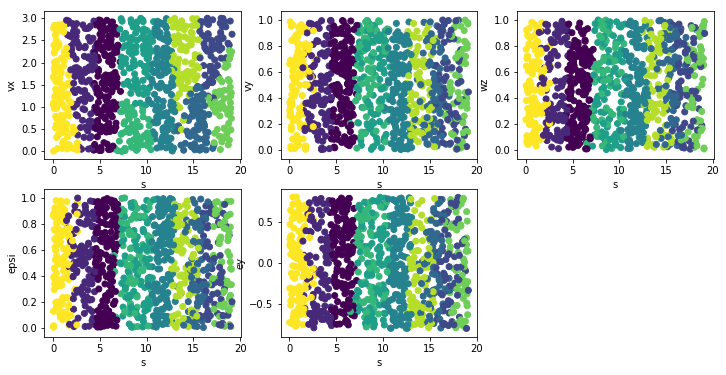

In [38]:
data = np.load('pwa_model_10.npz')
# looks like everything is in the same region here....

labels = []
for z,y in zip(zs,ys):
    dot_pdt = [w.T.dot(np.hstack([z[0:n], [1]])) for w in data['region_fns']]
    labels.append(np.argmax(dot_pdt))

plt.figure(figsize=[12,6])
for i in range(n-1):
    plt.subplot(2, 3, i+1)
    ind = i if i < 4 else 5
    plt.scatter(zs[:,4], zs[:,ind], c=labels)
    plt.xlabel(state_names[4]); plt.ylabel(state_names[ind])
# self.clustering = pwac.ClusterPWA.from_labels(zs, ys, 
#                data['labels'], z_cutoff=self.n)
# self.clustering.region_fns = data['region_fns']

In [22]:
data.keys()

['labels', 'region_fns', 'ys', 'zs', 'thetas']

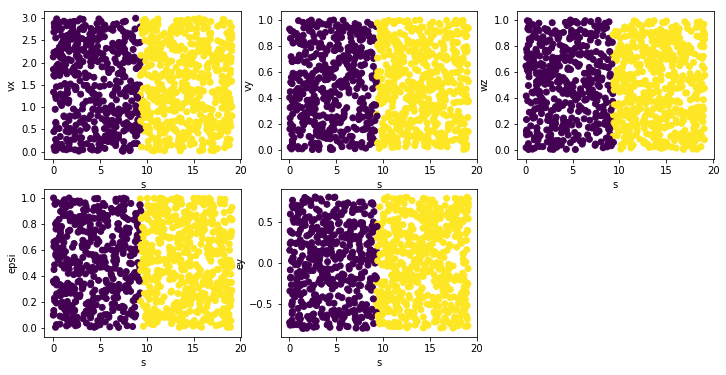

In [17]:
plt.figure(figsize=[12,6])
for i in range(n-1):
    plt.subplot(2, 3, i+1)
    ind = i if i < 4 else 5
    plt.scatter(best_clustering.zs[:,4], best_clustering.zs[:,ind], c=best_clustering.cluster_labels)
    plt.xlabel(state_names[4]); plt.ylabel(state_names[ind])

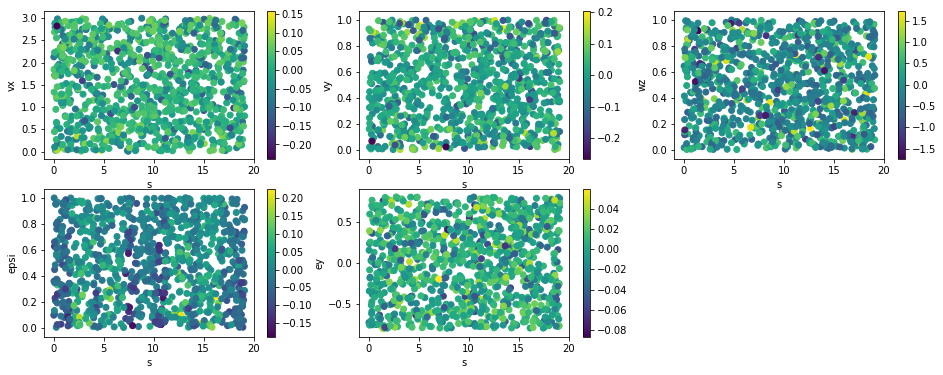

In [18]:
yhats = []
for z,y in zip(best_clustering.zs, best_clustering.ys):
    yhats.append(best_clustering.get_prediction(z))
yhats = np.array(yhats)

plt.figure(figsize=[16,6])
for i in range(n-1):
    plt.subplot(2, 3, i+1)
    ind = i if i < 4 else 5
    plt.scatter(best_clustering.zs[:,4], best_clustering.zs[:,ind], c=(best_clustering.ys[:,ind]-yhats[:,ind]))
    plt.xlabel(state_names[4]); plt.ylabel(state_names[ind]); plt.colorbar()

In [9]:
best_clustering.Nc

15

In [8]:
print(x_next)
print(x_glob_next)

[  0.40271081  -0.0565205   -0.51047363   0.06231556  11.55229491
  -0.59633254]
[ 0.40362651 -0.05722567 -0.51032248  3.10423143 -2.42395266 -3.05482882]


In [ ]:
# 10 regions (fit from sim)
[[ 0.99 -0.04 -0.03  0.02  0.    0.03   nan  0.21  0.11   nan -0.  ]
 [ 0.08  0.26 -0.03 -0.05  0.   -0.02   nan  0.24  0.02   nan -0.08]
 [-0.11  0.73 -0.05 -0.28  0.    0.31   nan  2.93  0.13   nan  0.04]
 [ 0.02  0.03  0.02  1.   -0.   -0.03   nan  0.16  0.02   nan  0.  ]
 [ 0.08  0.02 -0.   -0.07  1.   -0.03   nan  0.01 -0.     nan  0.02]
 [ 0.06  0.02 -0.    0.09  0.    0.99   nan  0.03  0.02   nan -0.05]]

In [ ]:
# 2 regions (fit from sim)
[[ 0.98  0.03 -0.01  0.01  0.    0.     nan  0.07  0.1    nan -0.01]
 [ 0.06  0.22 -0.02 -0.03  0.    0.     nan  0.23  0.02   nan -0.05]
 [ 0.05  0.28  0.01 -0.02  0.    0.04   nan  2.73  0.04   nan -0.07]
 [ 0.03  0.01  0.02  1.01  0.   -0.02   nan  0.18  0.     nan  0.  ]
 [ 0.08 -0.    0.   -0.06  1.   -0.03   nan -0.01 -0.     nan  0.02]
 [ 0.05  0.03 -0.    0.08  0.    1.     nan  0.03  0.01   nan -0.04]]
[[ 0.98  0.02 -0.01 -0.   -0.   -0.     nan  0.15  0.1    nan  0.  ]
 [ 0.06  0.24 -0.04 -0.03 -0.    0.01   nan  0.18  0.01   nan -0.05]
 [ 0.07  0.1   0.07  0.07  0.01  0.08   nan  3.32  0.01   nan -0.04]
 [ 0.03  0.01  0.03  1.    0.   -0.02   nan  0.2   0.     nan  0.  ]
 [ 0.09 -0.01  0.01 -0.06  1.   -0.04   nan -0.01  0.     nan  0.02]
 [ 0.05  0.04 -0.    0.08 -0.    1.     nan  0.03  0.     nan -0.04]]


In [ ]:
# 2 (1) regions (fit from trajectory)
[[ 0.95  0.53 -0.05 -0.01 -0.    0.03   nan  0.01  0.09   nan  0.01]
 [-0.01 -0.    0.01 -0.    0.   -0.01   nan  0.25 -0.     nan  0.01]
 [-0.19 -0.94  0.15 -0.02  0.   -0.08   nan  2.41 -0.03   nan  0.12]
 [ 0.02  0.01  0.02  1.09 -0.    0.02   nan  0.18  0.01   nan  0.  ]
 [ 0.09 -0.02  0.   -0.01  1.   -0.02   nan -0.    0.     nan  0.  ]
 [ 0.01 -0.03  0.01  0.07  0.    1.     nan  0.02  0.     nan -0.  ]]
[[ 0.83  0.39 -0.05  0.02 -0.   -0.05   nan  0.04  0.09   nan  0.12]
 [-0.01 -0.12  0.02  0.   -0.   -0.     nan  0.25 -0.     nan  0.01]
 [-0.21 -2.13  0.27  0.03 -0.   -0.04   nan  2.43 -0.     nan  0.14]
 [ 0.01 -0.22  0.05  1.1  -0.    0.01   nan  0.18 -0.     nan  0.01]
 [ 0.08  0.03 -0.   -0.    1.   -0.03   nan  0.    0.     nan  0.01]
 [ 0.    0.01  0.    0.07 -0.    1.     nan  0.02  0.     nan -0.  ]]
